<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/PreTrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install torchvision

In [4]:

#!pip list
import torch

In [5]:
#!nvidia-smi

In [6]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
# add headings with ##(space) on the markdowns

In [8]:
#!pip install tensorflor keras

In [9]:
import tensorflow as tf
import os

In [10]:
!nvidia-smi

Tue May 14 21:20:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:2D:00.0  On |                  N/A |
|  0%   49C    P0              41W / 125W |    686MiB /  6144MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
#! nvidia-smi

In [14]:
#!pip install opencv-python

## Imports

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
#Current_dir = os.getcwd()
#Current_dir

In [19]:
#path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
#os.chdir(path)

In [20]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [21]:
data_dir='data_medium'
os.listdir(data_dir)

['Ads', 'Sample_Images']

In [22]:
#os.listdir(os.path.join(data_dir,'Ads'))

In [23]:
imgTest= cv2.imread(os.path.join('data','Ads','converted_iframe_9_AD.jpg'))

In [24]:
type(imgTest)

NoneType

In [25]:
#imgTest.shape

In [26]:
#plt.imshow(imgTest)

In [27]:
#plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))
#plt.show()

# Load Data

In [28]:
#tf.data.Dataset??

In [29]:
#tf.keras.utils.audio_dataset_from_directory??

In [30]:
data=tf.keras.utils.image_dataset_from_directory('data_medium', batch_size=32, image_size=(150,150))

Found 29687 files belonging to 2 classes.


In [31]:
data_iterator=data.as_numpy_iterator()


In [32]:
batch=data_iterator.next()


In [33]:
len(batch) # batch contain 2 items, the image batch[0] and the label batch[1]

2

In [34]:
batch[0].shape # images are numpy arrays

(32, 150, 150, 3)

In [35]:
batch[1] # labels

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

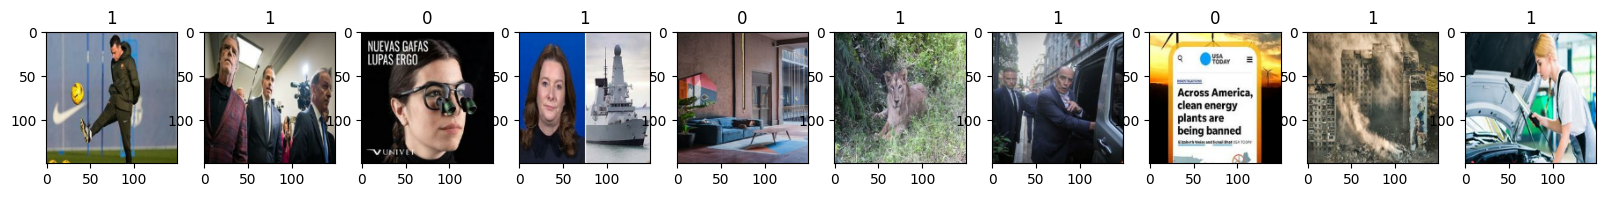

In [36]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20)) # class 1= simple image, class 0 = Ad
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From the above plot, we see how the function assigns the classes (this may change from run-to-run):

simple image = 1 <br>
Ad = 0

## Preprocess data

In [37]:
print(batch[0].max()) # our pixels are between values 0 and 255. we will scale them to be between 0 and 1

255.0


In [38]:
#batch[0] / 255

In [39]:
scaled= data.map(lambda x,y: (x/255, y)) # as we load a batch from the pipeline, we scale them on the go

In [40]:
#scaled.as_numpy_iterator().next()

In [41]:
scaled_iterator=scaled.as_numpy_iterator()

In [42]:
batch = scaled_iterator.next()

In [43]:
batch[0].max()

1.0

In [44]:
#scaled.as_numpy_iterator().next()

## Feature Extraction

In [45]:
import keras
from keras.models import load_model

In [46]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [48]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [49]:
base_dir = r"C:\Users\YannisPC\PycharmProjects\Thesis\Thesis\data split"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')
validation_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\data split\\validate'

In [50]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [51]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
        )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [52]:
train_features, train_labels = extract_features(train_dir, 24247)
validation_features, validation_labels = extract_features(validation_dir, 7965)
test_features, test_labels = extract_features(test_dir, 7119)

Found 24247 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
Found 7965 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
Found 7119 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


The extracted features are currently of shape (samples, 4, 4, 512). We will feed them to a densely-connected classifier, so first we must flatten them to (samples, 8192):

In [53]:
train_features = np.reshape(train_features, (24247, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (7965, 4 * 4 * 512))
test_features = np.reshape(test_features, (7119, 4 * 4 * 512))

At this point, we can define our densely-connected classifier (note the use of dropout for regularization), and train it on the data and labels that we just recorded:

In [54]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
1213/1213 [==============================] - 8s 6ms/step - loss: 0.3399 - acc: 0.8568 - val_loss: 0.2983 - val_acc: 0.8825
Epoch 2/30
1213/1213 [==============================] - 8s 7ms/step - loss: 0.2696 - acc: 0.8970 - val_loss: 0.2863 - val_acc: 0.8901
Epoch 3/30
1213/1213 [==============================] - 8s 7ms/step - loss: 0.2496 - acc: 0.9063 - val_loss: 0.2725 - val_acc: 0.8970
Epoch 4/30
1213/1213 [==============================] - 9s 7ms/step - loss: 0.2339 - acc: 0.9126 - val_loss: 0.2681 - val_acc: 0.9024
Epoch 5/30
1213/1213 [==============================] - 8s 7ms/step - loss: 0.2244 - acc: 0.9194 - val_loss: 0.2893 - val_acc: 0.8832
Epoch 6/30
1213/1213 [==============================] - 9s 7ms/step - loss: 0.2171 - acc: 0.9206 - val_loss: 0.2709 - val_acc: 0.9009
Epoch 7/30
1213/1213 [==============================] - 8s 7ms/step - loss: 0.2094 - acc: 0.9268 - val_loss: 0.2735 - val_acc: 0.9006
Epoch 8/30
1213/1213 [==============================] - 8s 7ms

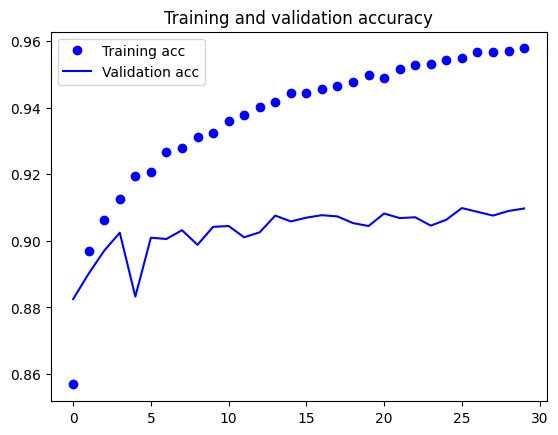

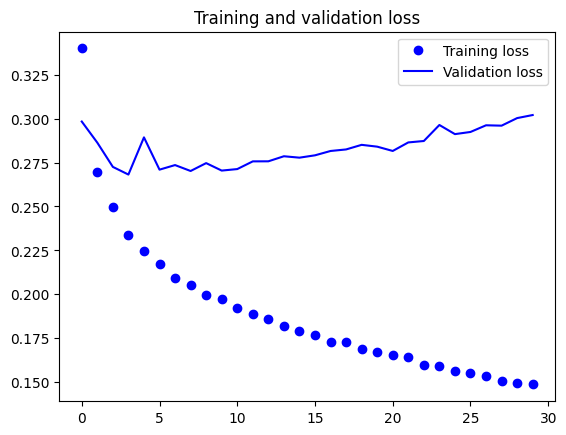

In [55]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Split Data

In [45]:
#len(scaled)
len(data)

928

In [46]:
#train_size = int(len(scaled)*.7)# batch size 32
#val_size = int(len(scaled)*.2) #
#test_size = int(len(scaled)*.1) #

In [47]:
#print(f'Train Size: {train_size}, Val Size:{val_size}, Test Size: {test_size}')


Train Size: 649, Val Size:185, Test Size: 92


In [48]:
#train = scaled.take(train_size)
#val = scaled.skip(train_size).take(val_size)
#test = scaled.skip(train_size+val_size).take(test_size)

In [49]:
#train.as_numpy_iterator().next()[0]

In [50]:
#batch[0]

In [51]:
#len(train)

649

## Pretrained Model VGG16

In [52]:
import keras
from keras.models import load_model


# Appling a Pre-trained CNN on our Dataset for comparison

The VGG16 model

In [53]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [54]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We will add a dense layer after our conv_base NN

In [56]:
from keras import models
from keras import layers

modelPreT = models.Sequential()
modelPreT.add(conv_base)

modelPreT.add(layers.Flatten())
modelPreT.add(layers.Dense(256, activation='relu'))
modelPreT.add(layers.Dense(1, activation='sigmoid'))

In [57]:
modelPreT.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before training the model, we need to separate the pretrained model from our DNN which is added on top of that. So that when we train our model we dont ruin the pretrained weights and biased of the VGG16

In [58]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelPreT.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [59]:
conv_base.trainable = False

In [60]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(modelPreT.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [66]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

modelPreT.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])



Found 24247 images belonging to 2 classes.
Found 7965 images belonging to 2 classes.


C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [65]:
len(train_generator)

1213

In [67]:
history = modelPreT.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
100/100 - 14s - loss: 0.4629 - acc: 0.8040 - val_loss: 0.3923 - val_acc: 0.8420 - 14s/epoch - 141ms/step
Epoch 2/30
100/100 - 12s - loss: 0.3686 - acc: 0.8490 - val_loss: 0.3722 - val_acc: 0.8490 - 12s/epoch - 124ms/step
Epoch 3/30
100/100 - 13s - loss: 0.3871 - acc: 0.8345 - val_loss: 0.3470 - val_acc: 0.8610 - 13s/epoch - 126ms/step
Epoch 4/30
100/100 - 17s - loss: 0.3773 - acc: 0.8430 - val_loss: 0.3384 - val_acc: 0.8680 - 17s/epoch - 169ms/step
Epoch 5/30
100/100 - 16s - loss: 0.3529 - acc: 0.8495 - val_loss: 0.3357 - val_acc: 0.8640 - 16s/epoch - 163ms/step
Epoch 6/30
100/100 - 16s - loss: 0.3467 - acc: 0.8605 - val_loss: 0.3364 - val_acc: 0.8610 - 16s/epoch - 158ms/step
Epoch 7/30
100/100 - 16s - loss: 0.3267 - acc: 0.8720 - val_loss: 0.3570 - val_acc: 0.8640 - 16s/epoch - 157ms/step
Epoch 8/30
100/100 - 13s - loss: 0.3420 - acc: 0.8625 - val_loss: 0.3489 - val_acc: 0.8520 - 13s/epoch - 126ms/step
Epoch 9/30
100/100 - 12s - loss: 0.3483 - acc: 0.8560 - val_loss: 0.3175

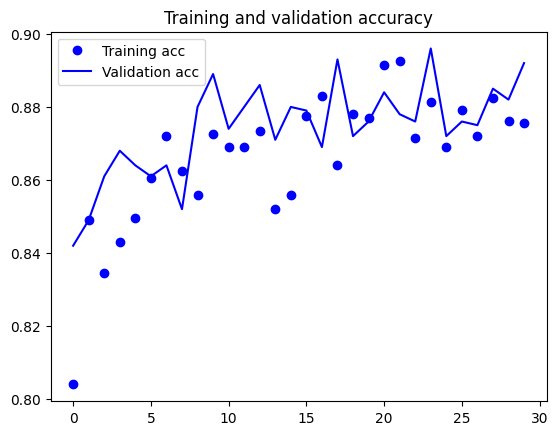

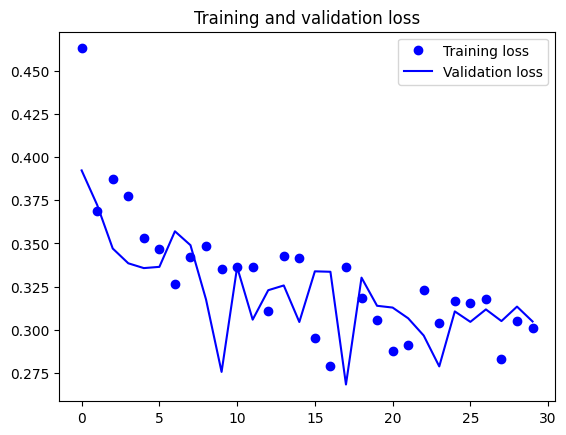

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [60]:
#modelPreT.compile('Adagrad', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])# Adagrad, adam

In [61]:
#train.as_numpy_iterator().next()[0]

In [62]:
histPreT = modelPreT.fit(train, epochs=30, validation_data=val) #  epochs 10 are over fitting. early stop at?

Epoch 1/30
649/649 [==============================] - 75s 104ms/step - loss: 0.3547 - accuracy: 0.8598 - val_loss: 0.3085 - val_accuracy: 0.8836
Epoch 2/30
649/649 [==============================] - 69s 106ms/step - loss: 0.2990 - accuracy: 0.8883 - val_loss: 0.2856 - val_accuracy: 0.8939
Epoch 3/30
649/649 [==============================] - 69s 106ms/step - loss: 0.2820 - accuracy: 0.8954 - val_loss: 0.2771 - val_accuracy: 0.8975
Epoch 4/30
649/649 [==============================] - 69s 106ms/step - loss: 0.2706 - accuracy: 0.8999 - val_loss: 0.2736 - val_accuracy: 0.8973
Epoch 5/30
649/649 [==============================] - 69s 107ms/step - loss: 0.2634 - accuracy: 0.9021 - val_loss: 0.2700 - val_accuracy: 0.8992
Epoch 6/30
649/649 [==============================] - 71s 109ms/step - loss: 0.2572 - accuracy: 0.9047 - val_loss: 0.2680 - val_accuracy: 0.8997
Epoch 7/30
649/649 [==============================] - 70s 108ms/step - loss: 0.2513 - accuracy: 0.9059 - val_loss: 0.2650 - val_ac

KeyboardInterrupt: 

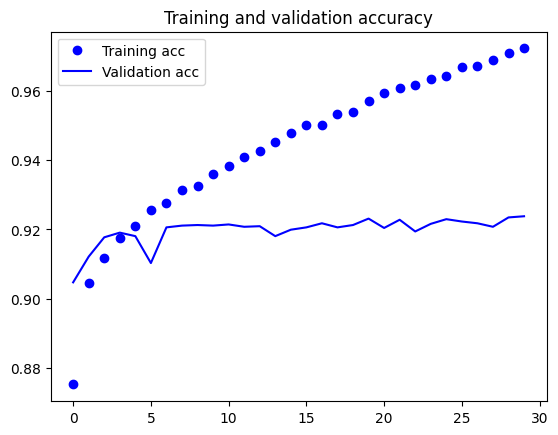

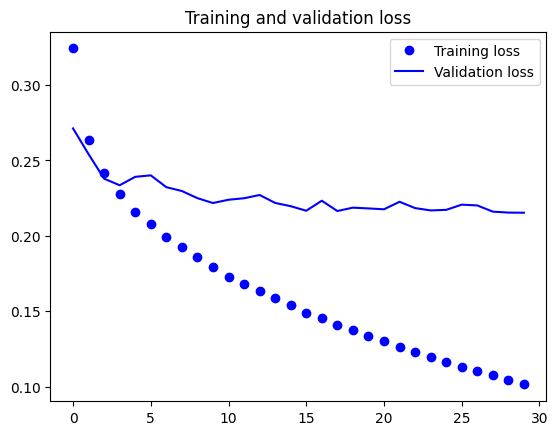

In [ ]:
acc = histPreT.history['accuracy']
val_acc = histPreT.history['val_accuracy']
loss = histPreT.history['loss']
val_loss = histPreT.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhatPreT = modelPreT.predict(X)
    pre.update_state(y, yhatPreT)
    re.update_state(y, yhatPreT)
    acc.update_state(y, yhatPreT)
    print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

1/1 [==============================] - 0s 204ms/step
Precision: 0.8518518805503845, Recall:0.9583333134651184, Accuracy: 0.84375
1/1 [==============================] - 0s 28ms/step
Precision: 0.9019607901573181, Recall:0.978723406791687, Accuracy: 0.90625
1/1 [==============================] - 0s 28ms/step
Precision: 0.9305555820465088, Recall:0.9852941036224365, Accuracy: 0.9375
1/1 [==============================] - 0s 28ms/step
Precision: 0.9175257682800293, Recall:0.967391312122345, Accuracy: 0.9140625
1/1 [==============================] - 0s 29ms/step
Precision: 0.9316239356994629, Recall:0.9732142686843872, Accuracy: 0.9312499761581421
1/1 [==============================] - 0s 29ms/step
Precision: 0.9264705777168274, Recall:0.9618320465087891, Accuracy: 0.921875
1/1 [==============================] - 0s 27ms/step
Precision: 0.9240506291389465, Recall:0.9605262875556946, Accuracy: 0.9196428656578064
1/1 [==============================] - 0s 27ms/step
Precision: 0.9222221970558167

In [ ]:
modelPreT.save(os.path.join('models','Pretrained_VGG16_ad_class_medium30000.h5'))

# Test unseen inages

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
#os.chdir('..')
#os.chdir('Thesis')

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
#imgPre= cv2.imread(os.path.join('unseen data','folder_5_main_12.jpg')) #
imgPre= cv2.imread(os.path.join('unseen data','mcdonalds.jpeg')) #
#imgPre

In [ ]:
import cv2

In [ ]:
len(imgPre)

153

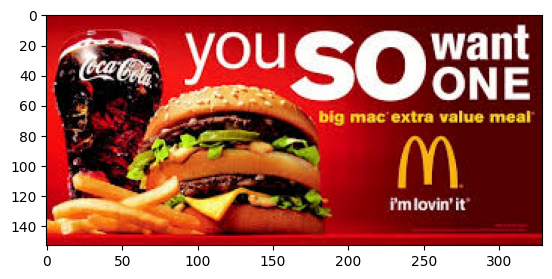

In [ ]:
plt.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
#plt.show()

In [ ]:
resizePreT = tf.image.resize(imgPre, (256,256))
#resizePreT

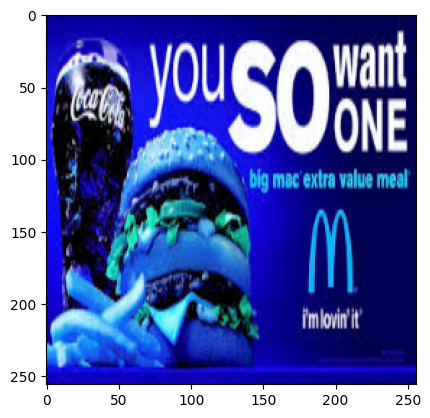

In [ ]:
plt.imshow(resizePreT.numpy().astype(int))
plt.show()

In [ ]:
#np.expand_dims(resizePreT,0).shape

In [ ]:
yhat_newPreT = modelPreT.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
yhat_newPreT

1/1 [==============================] - 1s 806ms/step


array([[0.03880483]], dtype=float32)

For the pretrained model the classes were inverted, so we have:

Simple Image = 1 <br>
Ad = 0

In [ ]:
#class 1= simple img, class 0 = Ad

if yhat_newPreT > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad


Our Model

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
from keras.models import load_model

loaded_model = load_model(os.path.join('models',"ad_classifier_first_medium30000_Model.keras"))
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                        

In [ ]:
yhat_loaded_model = loaded_model.predict(np.expand_dims(resizePreT/255, 0))#/ad_classifier_first_small_Model.keras
yhat_loaded_model

1/1 [==============================] - 0s 278ms/step


array([[1.3434918e-05]], dtype=float32)

In [ ]:
#class 1= simple img, class 0 = Ad

if yhat_loaded_model > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad


Medium Model (30000 images)

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
#loaded_model40 = load_model(os.path.join('data','models',"ad_classifier_medium.h5"))
loaded_model40 = load_model(os.path.join('models',"ad_classifier_medium.h5"))
loaded_model40.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                        

In [ ]:
yhat_loaded_model40 = loaded_model40.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
yhat_loaded_model40

1/1 [==============================] - 0s 104ms/step


array([[0.46027857]], dtype=float32)

In [ ]:
#class 1= simple img, class 0 = Ad

if yhat_loaded_model40 > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad
